# Clustering Analysis

## How Different Metrics Affect Clustering Results

In [22]:
%matplotlib inline

In [23]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

from sklearn.datasets import load_iris, load_wine

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin_min

### Table of Contents
- [Cluster Analysis](#cluster-analysis)
  - [Key Components of Cluster Analysis](#key-components-of-cluster-analysis)
  - [Types of Clustering](#types-of-clustering)
- [Clusters of Points](#what-are-clusters-of-points)
  - [Why does real-world data tend to clusterize?](#why-does-real-world-data-tend-to-clusterize)
  - [Examples of Real-World Data Clustering](#examples-of-real-world-data-clustering)
- [Unsupervised Learning](#unsupervised-learning)
  - [Key Concepts in Unsupervised Learning](#key-concepts-in-unsupervised-learning)
  - [Types of Unsupervised Learning](#types-of-unsupervised-learning)
  - [Applications of Unsupervised Learning](#applications-of-unsupervised-learning)
  - [Advantages of Unsupervised Learning](#advantages-of-unsupervised-learning)
  - [Challenges in Unsupervised Learning](#challenges-in-unsupervised-learning)
- [Type of Distances](#type-of-distances)
  - [Euclidean Distance](#euclidean-distance)
  - [Taxicab (Manhattan) Distance](#taxicab-manhattan-distance)
  - [Chebyshev Distance](#chebyshev-distance)
  - [Hexagonal Distance](#hexagonal-distance)
  - [Cosine Similarity](#cosine-similarity)
  - [Clustering Analysis in 2D](#clustering-analysis-in-2d)
  - [Clustering the Iris Dataset using K-Means](#clustering-the-iris-dataset-using-k-means)
  - [Clustering a Synthetic Dataset using DBSCAN](#clustering-a-synthetic-dataset-using-dbscan)
- [How are clusters defined?](#how-are-clusters-defined)
- [K-Means Clustering](#k-means-clustering)
  - [Algorithm step by step](#algorithm-step-by-step)
  - [Why K-Means Converges](#why-k-means-converges)
  - [K-Means Initialization Dependency](#k-means-initialization-dependency)
  - [Common Initialization Methods](#common-initialization-methods)
  - [Objective Function](#objective-function)
  - [K-Means++ Initialization](#k-means-initialization)
  - [Reducing Dependency on Initialization in K-Means Clustering](#reducing-dependency-on-initialization-in-k-means-clustering)
- [Agglomerative (Hierarchical) Clustering](#agglomerative-hierarchical-clustering)
  - [How It Works](#how-it-works)
  - [Linkage Criteria](#linkage-criteria)
  - [Visualization and Application](#visualization-and-application)
  - [Advantages and Disadvantages](#advantages-and-disadvantages)
- [Clustering with K-Means and Agglomerative Clustering on the Wine Dataset](#clustering-with-k-means-and-agglomerative-clustering-on-the-wine-dataset)
  - [Clustering with K-Means](#clustering-with-k-means)
  - [Agglomerative Clustering](#agglomerative-clustering)
  - [Differences Between K-Means and Agglomerative Clustering](#differences-between-k-means-and-agglomerative-clustering)
- [Using other metrics](#using-other-metrics)
  - [KMeans using Manhattan Distance and Cosine similarity](#kmeans-using-manhattan-distance-and-cosine-similarity)
  - [Agglomerative Clustering using Manhattan Distance and Cosine similarity](#agglomerative-clustering-using-manhattan-distance-and-cosine-similarity)


### Cluster Analysis
Many algorithms in data processing and machine learning depend on calculating distances, mainly for calculating errors. A class of algorithms which is based on distances is called **cluster analysis**. Cluster analysis, also known as clustering, is a statistical technique used to group similar objects into respective categories or clusters. The objective of cluster analysis is to ensure that objects within the same cluster are more similar to each other than to those in other clusters. This technique is widely used in various fields such as data mining, pattern recognition, image analysis, bioinformatics, and market research.

#### Key Components of Cluster Analysis
- **Objects and Features**: The entities being clustered (e.g., customers, genes, pixels) and their attributes or features (e.g., age, income, expression levels).
- **Distance Metrics**: Measures used to quantify the similarity or dissimilarity between objects. Common metrics include Euclidean distance, Manhattan distance, and Cosine similarity.
- **Clustering Algorithms**: Methods used to identify clusters in the data. Different algorithms suit different types of data and clustering objectives.

#### Types of Clustering
- **Hierarchical Clustering**: Builds a tree of clusters, either by merging small clusters into larger ones (agglomerative) or by splitting larger clusters into smaller ones (divisive).
- **Partitioning Clustering**: Divides the dataset into a predefined number of clusters, often using algorithms like K-means or K-medoids.
- **Density-Based Clustering**: Forms clusters based on the density of points in the data space, such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise).
- **Model-Based Clustering**: Assumes that the data is generated from a mixture of underlying probability distributions, typically Gaussian distributions, and uses models like Gaussian Mixture Models (GMM).

### What are Clusters of Points
Clusters of points refer to groups of data points in a dataset that are more similar to each other than to those in other groups. Clustering is a way to organize a set of objects into subsets, or clusters, such that objects in the same cluster are more similar to each other than to those in other clusters. This similarity can be based on various distance metrics or similarity measures.

In a two-dimensional space, clusters might appear as distinct groups of points that are close together, visually separated from other groups. In higher-dimensional spaces, clusters are identified based on their proximity in multiple dimensions.

Here we can see an example image how it looks:

<img src="images/clusters_of_pointpng.png" style="max-height: 350px" />

#### Now lets ask: Why does real-world data tend to clusterize?
Real-world data tends to clusterize due to several reasons:

- Natural Groupings: Many natural phenomena and processes generate data that naturally forms clusters. For example, in demographics, people tend to cluster in cities, in biology, species may cluster by habitat, and in marketing, customer preferences often form distinct groups.

- Shared Characteristics: Data points often share common characteristics or attributes that naturally bring them closer together. For instance, in social networks, friends of friends are likely to have common interests, forming clusters of similar individuals.

- Underlying Patterns: Real-world data is often generated by processes that have underlying patterns or structures. For example, economic activities tend to cluster in certain regions due to factors like resource availability, infrastructure, and market access.

- Anomalies and Outliers: Clustering helps in identifying not only the main groupings but also anomalies and outliers. These outliers often stand out from clusters, providing insights into irregularities in the data.

- Simplifying Complexity: Clustering helps in simplifying and understanding complex datasets by breaking them down into smaller, more manageable subgroups (divide and conquer). This is useful in fields like machine learning, where clustering can be used for data preprocessing, feature extraction, and improving the efficiency of algorithms.

#### Some examples of Real-World Data Clustering are:

- Customer Segmentation: In marketing, customers can be clustered based on purchasing behavior, demographics, or interests to tailor marketing strategies for different segments.

- Image Recognition: In computer vision, pixels in images can be clustered to identify objects, patterns, or regions within the image.

- Genomics: In bioinformatics, genes or proteins with similar functions or expressions can be clustered to study their relationships and functions.

- Urban Planning: In geography, clustering can identify urban areas, helping in urban planning and resource allocation.

### In addition let's say something and about what is **Unsupervised Learning**
Unsupervised learning is a type of machine learning where the model is trained on unlabeled data. This means that the algorithm learns from data without explicit instructions on what to predict. The goal is to uncover hidden patterns, structures, or features in the input data. Unlike supervised learning, where the training data includes input-output pairs, unsupervised learning deals only with the input data.

#### Key Concepts in Unsupervised Learning
- **Input Data**: The raw, unlabeled data that the algorithm processes. This data doesn't include any target values or outputs.
- **Patterns and Structures**: The goal is to identify meaningful patterns, structures, or relationships within the data.
- **Clusters and Groups**: One of the main tasks in unsupervised learning is clustering, which involves grouping similar data points together.

#### Types of Unsupervised Learning
1. **Clustering**: The process of grouping similar data points into clusters. The aim is to maximize the similarity within each cluster and minimize the similarity between different clusters.

    - **K-Means Clustering**: Divides the data into $ k $ clusters based on the distance to the centroids of the clusters.
    - **Hierarchical Clustering**: Builds a tree of clusters by either merging or splitting existing clusters iteratively.
    - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Groups together points that are closely packed together while marking points in low-density regions as outliers.
2. **Dimensionality Reduction**: The process of reducing the number of features or dimensions in the data while retaining as much information as possible.

    - **Principal Component Analysis (PCA)**: Transforms the data into a set of orthogonal components that capture the maximum variance.
    - **t-Distributed Stochastic Neighbor Embedding (t-SNE)**: A non-linear technique for reducing dimensions and visualizing high-dimensional data.
3. **Association Rule Learning**: Identifies interesting relationships or associations between variables in large datasets.

    - **Apriori Algorithm**: Finds frequent itemsets and generates association rules.
    - **Eclat Algorithm**: Uses a depth-first search to find frequent itemsets.
4. **Anomaly Detection**: Identifies unusual or rare events or observations in the data that do not conform to expected patterns.
    - **Isolation Forest**: Detects anomalies by isolating observations in a tree structure.
    - **Local Outlier Factor** (LOF): Measures the local density deviation of a given data point with respect to its neighbors.

#### Applications of Unsupervised Learning
- **Customer Segmentation**: Clustering customers based on purchasing behavior, demographics, or preferences for targeted marketing.
- **Image and Video Analysis**: Grouping similar images or video frames for compression, recognition, or retrieval.
- **Anomaly Detection**: Identifying fraudulent transactions, network intrusions, or unusual patterns in time series data.
- **Market Basket Analysis**: Finding associations between products in transactional data to optimize cross-selling strategies.
- **Genomics**: Discovering subtypes of diseases, gene expressions, or genetic variations.

#### Advantages of Unsupervised Learning
- **Exploratory Data Analysis**: Helps in understanding the structure and distribution of data without prior knowledge.
- **Feature Learning**: Automatically identifies important features and representations of the data.
- **No Need for Labeled Data**: Useful in scenarios where labeled data is scarce or expensive to obtain.

#### Challenges in Unsupervised Learning
- **Evaluation Metrics**: Difficult to evaluate the performance of unsupervised learning models since there are no ground truth labels.
- **Complexity**: Algorithms can be computationally intensive and may require significant tuning and preprocessing.
- **Interpretability**: Results may be harder to interpret compared to supervised learning, especially in high-dimensional spaces.

So **Unsupervised Learning** plays a crucial role in various applications, from market segmentation to anomaly detection, and continues to be an essential tool in the data scientist's toolkit. 

 Cluster analysis is a powerful tool for uncovering hidden patterns and structures in data, aiding in decision-making and predictive analysis. The choice of distance metric and clustering algorithm is crucial for obtaining meaningful and actionable clusters. One important application of linear algebra is to calculate distances between two points. There are many different ways to calculate a distance.

## Type of Distances

### Euclidean distance
 The one which is most familiar to us (so far) is the **Euclidean distance**. In 2D space, given points $A (x_A; y_A)$ and $B(x_B; y_B)$, to find Euclidean distance, we imagine a straight line between the two points. Then we find the square root of the sum of the square of the difference of the $ x $ values and the square of the difference of the $ y $ values. This can be seen by applying the Pythagorean theorem to a right triangle with horizontal and vertical sides, having the 
line segment from $A$ to $B$ as its hypotenuse: 

$$ d(A,B) = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2} = \sqrt{(\Delta x)^2 + (\Delta y)^2} $$
 
In $n$-dimensional space:
$$ d(A, B) = \sqrt{(x_{B_1} - x_{A_1})^2 + (x_{B_2} - x_{A_2})^2 + \ldots + (x_{B_n} - x_{A_n})^2} = \sqrt{\sum_{i=1}^{n} (x_{B_i} - x_{A_i})^2} $$
It is also possible to compute the distance for points given by polar coordinates. If the polar coordinates of $A$ are ($r, \theta$) and the polar coordinates of $B$ are ($s, \varphi$) then their distance is given by the law of cosines:
$$ d(A, B) = \sqrt{r^2 + s^2 + 2rs\cos(\theta - \varphi)}$$

For example lets see two points $A(1, 2)$ and $B(4, 6)$.

$$ d(A, B) = \sqrt{(4 - 1)^2 + (6 - 2)^2} = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5 $$
So the Euclidean distance between $A$ and $B$ is  $ \mathbf{5} $.

There are many more definitions of distance...

### Let's see somnething about **taxicab  (Manhattan) distance**
Taxicab geometry or Manhattan geometry is geometry where the familiar Euclidean distance is ignored. The idea is based on that the distance between two points in 2D space $A (x_A; y_A)$ and $B(x_B; y_B)$ is found by following a grid (by only considering horizontal and vertical paths like a taxi driving on a grid of streets), rather than following a straight line. The formula represents the sum of the absolute value of the differences of $ x $ values and the absolute value of the difference of $ y $ values: 
$$ d(A, B) = \mid x_B-x_A \mid + \mid y_B-y_A \mid $$
The taxicab distance between two points $A(x_{A_1}, x_{A_2}, \ldots, x_{A_n})$ and $B(x_{B_1}, x_{B_2}, \ldots, x_{B_n})$ in an $n$-dimensional real coordinate space with a fixed Cartesian coordinate system is the sum of the absolute differences of their coordinates:
$$ d(A,B) = \sum_{i=1}^{n} \mid x_{A_i} - y_{B_i} \mid $$

For example let's see again two points $ A(1, 2) $ and $ B(4, 6) $.

$$ d(A, B) = |4 - 1| + |6 - 2| = 3 + 4 = 7 $$

Now the Taxicab distance between $A$ and $B$ is $ \mathbf{7} $.

### Chebyshev Distance
Chebyshev distance provides a measure of distance between points that focuses on the maximum difference along any coordinate dimension, making it particularly useful in scenarios where the maximum movement or reachability in any direction is critical.

In 2D space:
$$ d(A, B) = \max(\mid x_B - x_A \mid, \mid y_B - y_A \mid) $$
This formula calculates the Chebyshev distance by taking the maximum of the absolute differences in the $ x $ and $ y $ coordinates between points $ A $ and $ B $.

In $ n $-dimensional space, the Chebyshev distance between two points $ A(x_{A_1}, x_{A_2}, \ldots, x_{A_n}) $ and $ B(x_{B_1}, x_{B_2}, \ldots, x_{B_n}) $ is computed similarly, considering the maximum absolute difference across all dimensions:

$$ d(A, B) = \max_{i} \mid x_{A_i} - x_{B_i} \mid $$

Here, $ \mid x_{A_i} - x_{B_i} \mid $ represents the absolute difference between the $ i $-th coordinate of points $ A $ and $ B $, and the Chebyshev distance is the maximum of these differences across all dimensions $ i $.

For example, to calculate the Chebyshev distance between $ A(1, 2) $ and $ B(4, 6) $ in 2D space:

$$ d(A, B) = \max(|4 - 1|, |6 - 2|) = \max(3, 4) = 4 $$

So now the Chebyshev distance between $A$ and $B$ is $ \mathbf{4} $.

### Hexagonal Distance

$$ d(A, B) = \frac{|1 - 4| + |1 + 2 - 4 - 6| + |2 - 6|}{2} = \frac{3 + |-7| + 4}{2} = \frac{3 + 7 + 4}{2} = 7 $$

The hexagonal distance between $ A $ and $ B $ in axial coordinates is $ \mathbf{7} $.

**Example in Cube Coordinates:**

Consider two points $ A(1, -2, 1) $ and $ B(4, -4, 0) $.

$$ d(A, B) = \max(|1 - 4|, |-2 - (-4)|, |1 - 0|) = \max(3, 2, 1) = 3 $$

Therefore, the hexagonal distance between $ A $ and $ B $ in cube coordinates is $ \mathbf{3} $.

### Cosine Similarity

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. It is widely used in various applications such as text mining, information retrieval, and recommendation systems. It is particularly useful for high-dimensional data and applications where the magnitude and orientation of vectors are important factors in determining similarity.

In vector space $ \mathbb{R}^n $, given two vectors $ \mathbf{A} = (a_1, a_2, \ldots, a_n) $ and $ \mathbf{B} = (b_1, b_2, \ldots, b_n) $, the cosine similarity $ \text{sim}(\mathbf{A}, \mathbf{B}) $ is computed as:

$$ \text{sim}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\|} = \frac{\sum_{i=1}^{n} a_i b_i}{\sqrt{\sum_{i=1}^{n} a_i^2} \sqrt{\sum_{i=1}^{n} b_i^2}} $$

Here:
- $ \mathbf{A} \cdot \mathbf{B} $ denotes the dot product of vectors $ \mathbf{A} $ and $ \mathbf{B} $
- $ \|\mathbf{A}\| $ and $ \|\mathbf{B}\| $ are the Euclidean norms (lengths) of vectors $ \mathbf{A} $ and $ \mathbf{B} $, respectively.

##### For example

Consider two vectors $ \mathbf{A} = (2, 3, 1) $ and $ \mathbf{B} = (1, 4, 2) $.

- Calculate the dot product $ \mathbf{A} \cdot \mathbf{B} $:
$$ \mathbf{A} \cdot \mathbf{B} = 2 \cdot 1 + 3 \cdot 4 + 1 \cdot 2 = 2 + 12 + 2 = 16 $$

- Calculate the Euclidean norms:
$$ \|\mathbf{A}\| = \sqrt{2^2 + 3^2 + 1^2} = \sqrt{4 + 9 + 1} = \sqrt{14} \approx 3.74 $$
$$ \|\mathbf{B}\| = \sqrt{1^2 + 4^2 + 2^2} = \sqrt{1 + 16 + 4} = \sqrt{21} \approx 4.58 $$

- Compute the cosine similarity:
$$ \text{sim}(\mathbf{A}, \mathbf{B}) = \frac{16}{3.74 \times 4.58} \approx \frac{16}{17.13} \approx 0.934 $$

Therefore, the cosine similarity between $ \mathbf{A} $ and $ \mathbf{B} $ is approximately $ \mathbf{0.934} $.


### Now we can see some examples of **clustering analysis** in 2D

#### Clustering the Iris Dataset using K-Means
We will use the **Iris** dataset, because it is a classic dataset that contains measurements of iris flowers from three different species, it is also a typical test case for many statistical classification techniques in machine learning such as support vector machines. The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species). We will use only the first two features for 2D visualization.

The iris flower:

<img src="images/iris_flowerpng.png" style="max-height: 350px" />

In [24]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # get only the first two features (type = numpy.ndarray)

c:\Users\VaGGeorgiev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


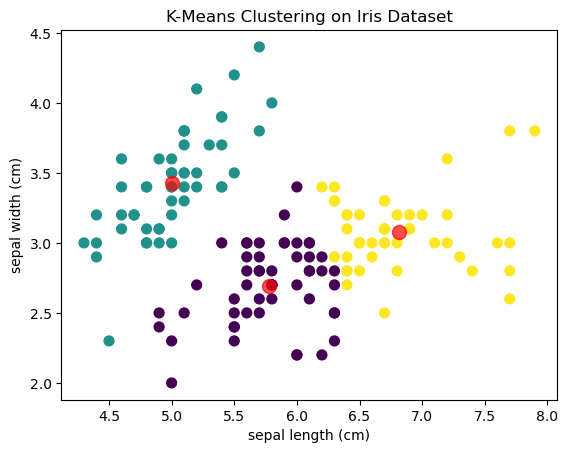

In [25]:
# Initialize K-Means with 3 clusters
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 0) # type - sklearn.utils._bunch.Bunch
y_kmeans = kmeans.fit_predict(X)

# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = "viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "red", s = 100, alpha = 0.70)
plt.xlabel(iris.feature_names[0]) 
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering on Iris Dataset")
plt.show()

This plot shows the clustering of iris flowers based on `sepal length` and `sepal width`, with cluster centers marked in red.

#### Clustering a Synthetic Dataset using DBSCAN
We can generate a synthetic dataset using **make_blobs** and apply DBSCAN to it.

`make_blobs` is a function in the `sklearn.datasets` module of scikit-learn that generates synthetic datasets for clustering. This function is particularly useful for creating datasets with a specified number of clusters, each containing points drawn from a Gaussian distribution.

In [26]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Apply DBSCAN
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
y_dbscan = dbscan.fit_predict(X_scaled)

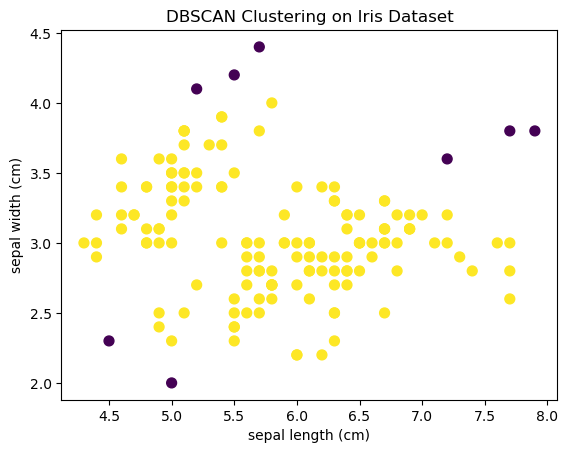

In [28]:
# Plotting the results
plt.scatter(X[:, 0], X[:, 1], c = y_dbscan, s = 50, cmap = "viridis")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()

This plot shows the DBSCAN clustering of iris flowers based on sepal length and sepal width, with different clusters in different colors and noise points (if any) marked differently.

#### Explanation
- **K-Means Clustering**: The `KMeans` algorithm partitions the dataset into k clusters by minimizing the variance within each cluster. The plot will show how the data points are grouped into clusters and where the centroids are located.

- **DBSCAN Clustering**: The `DBSCAN` algorithm identifies clusters based on the density of points. Points in high-density regions form clusters, while points in low-density regions are considered noise. The result represents how DBSCAN identifies clusters of varying shapes and sizes, with noise points indicated differently.

### How are clusters defined?

Clusters are defined as groups of data points that exhibit a higher degree of similarity to each other than to points in other groups. The definition and formation of clusters depend on the **clustering algorithm** and the **distance metric** used. Here are the fundamental concepts and criteria that are typically used to define clusters:

**Centroid-Based Clusters (K-Means)**: A cluster is defined by its centroid, which is the arithmetic mean of all the points in the cluster.

$$ \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i $$

where $|C_k|$ is the number of points in cluster $C_k$, and $x_i$ represents the data points in the cluster.

- **Centroid**: The centroid $ \mu_k $ is the average of all points $x_i$ in the cluster $ C_k $.
- **Distance Metric**: Points are assigned to the cluster whose centroid is nearest in terms of Euclidean distance.
- **Update**: In each iteration, K-Means updates the centroids based on the mean of the points currently assigned to each cluster.


**Density-Based Clusters (DBSCAN)**: Clusters are defined as dense regions of points separated by regions of lower density.
For a point $ x $ in cluster $ C $:

$$ |\{ y \in \mathbb{R}^d \ | \ d(x, y) \leq \epsilon \}| \geq \text{minPts} $$

where $ \epsilon $ is the radius for the neighborhood of $ x $, and $ \text{minPts} $ is the minimum number of points required to form a dense region.

- **Core Points**: Points that have at least $ \text{minPts} $ within $ \epsilon $-radius.
- **Border Points**: Points within $ \epsilon $-radius of a core point but with fewer than $ \text{minPts} $ neighbors.
- **Noise Points**: Points that are not within $\epsilon$-radius of any core point.
- **Cluster Formation**: Clusters are formed by core points and their density-reachable points.

### K-Means Clustering

Let's talk about **K-Means Clustering** with more details.

K-Means clustering is an unsupervised learning algorithm used to partition a dataset into $ K $ distinct, non-overlapping subsets (or clusters). The algorithm aims to minimize the within-cluster variance by iteratively updating the cluster centroids and the assignment of data points to these centroids.

#### Algorithm step by step:

1. Initialization: Randomly choose $ K $ initial centroids (means).
2. Assignment Step: Assign each data point to the nearest centroid, forming $ K $ clusters.
3. Update Step: Compute the new centroid of each cluster by taking the mean of all data points assigned to the cluster.
4. Repeat: Repeat the assignment and update steps until the centroids no longer change significantly (i.e., convergence is reached).

**Mathematical Formulation**:

Let $ \mathbf{X} = \{ \mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N \} $ be a set of $ N $ data points in $ \mathbb{R}^d $. The objective of K-Means clustering is to find the set of centroids $ \{ \mu_1, \mu_2, \ldots, \mu_K \} $ that minimizes the following objective function:

$$ J = \sum_{k=1}^K \sum_{\mathbf{x} \in C_k} \| \mathbf{x} - \mu_k \|^2 $$

where $ C_k $ is the set of points assigned to the $ k $ -nth cluster, and $ \| \cdot \| $ denotes the Euclidean norm.

#### Why K-Means Converges

K-Means converges because it optimizes the objective function \( J \) by iteratively reducing the within-cluster variance. Here's why:

1. **Finite Number of Partitions**:
   - The number of possible ways to partition $ N $ points into $ K $ clusters is finite. Each assignment of points to clusters corresponds to a particular partition.
   
2. **Monotonic Decrease of the Objective Function**:
   - In each iteration of K-Means, the objective function $ J $ either decreases or remains the same. 
   - **Assignment Step**: Assigning each point to the nearest centroid minimizes the within-cluster variance for that iteration.
   - **Update Step**: Recomputing the centroids as the mean of the assigned points reduces the total distance from the points to the centroids.
   - Therefore, each step of the algorithm either lowers the value of $ J $ or leaves it unchanged.

3. **Convergence Criteria**:
   - The algorithm stops when the centroids no longer change, meaning the assignments of points to clusters remain constant. This occurs when the algorithm has reached a local minimum in the objective function $ J $.
   - Since the algorithm continually reduces $ J $ and there are a finite number of partitions, the process must eventually converge.

**Note**: K-Means can converge to a local minimum rather than a global minimum because the initial choice of centroids can affect the final clustering result. To mitigate this, it is common to run the algorithm multiple times with different initializations and choose the best result based on the lowest objective function value.

### K-Means Initialization Dependency

We already know how the K-Means algorithm partitions data. The initial choice of centroids significantly impacts the algorithm's performance, including its convergence speed and the quality of the final clustering solution.

**Impact of Initialization**:
1. **Convergence to Local Minima**:
    - K-Means is sensitive to the initial placement of centroids because it can converge to a local minimum of the objective function $ J $
    - Different initializations can lead to different final cluster assignments and centroids.
    - Poor initialization can cause the algorithm to get stuck in suboptimal cluster configurations.

2. **Cluster Quality**:
    - The final clusters' quality, measured by metrics such as within-cluster sum of squares (WCSS) or silhouette score, can vary based on the initialization.
    - Good initialization helps achieve a lower WCSS and better-separated clusters.

3. **Convergence Speed**:
    - Properly initialized centroids can lead to faster convergence by starting closer to the optimal solution.
    - Random initialization may require more iterations to converge.

#### Common Initialization Methods

1. **Random Initialization**:
    - Randomly selects $ K $ data points as initial centroids.
    - Simple but can lead to poor results and slow convergence.

2. **K-Means++ Initialization**:
    - Improves upon random initialization by spreading out the initial centroids.
    - Steps:
        1. Randomly choose the first centroid from the data points.
        2. For each remaining centroid, select a point with a probability proportional to its distance squared from the nearest existing centroid.
        3. Repeat until $ K $ centroids are chosen.
    - This method helps to avoid poor clustering results by ensuring that initial centroids are well-spread.

#### Objective Function
The objective function $ J $ to minimize is:

$$ J = \sum_{k=1}^K \sum_{\mathbf{x} \in C_k} \| \mathbf{x} - \mu_k \|^2 $$

where:
- $ \mathbf{x} $ is a data point.
- $ \mu_k $ is the centroid of cluster $ C_k $

### Reducing Dependency on Initialization in K-Means Clustering

To mitigate the impact of initialization on the K-Means clustering algorithm, several strategies can be employed:

1. **Multiple Initializations (Random Restarts)**:
    - Run K-Means multiple times with different random initializations and select the clustering result with the lowest within-cluster sum of squares (WCSS).
    - This approach increases the chances of finding a better local minimum.

    $$ J^{(i)} = \sum_{k=1}^K \sum_{\mathbf{x} \in C_k^{(i)}} \| \mathbf{x} - \mu_k^{(i)} \|^2 $$
    where $ J^{(i)} $ is the objective function value for the $ i $-th run. Select the clustering result with the minimum $ J^{(i)} $:

    $$ J^* = \min_{i \in \{1, 2, \ldots, m\}} J^{(i)} $$

2. **K-Means++ Initialization**:
    - Use the K-Means++ initialization method to select initial centroids more intelligently.
    - This method ensures that initial centroids are spread out, leading to better and more consistent clustering results.

    Select the first centroid $ \mu_1 $ randomly from the data points. For each subsequent centroid $ \mu_k $, select with probability proportional to $ D(\mathbf{x})^2 $

    $$ P(\mathbf{x}) = \frac{D(\mathbf{x})^2}{\sum_{\mathbf{x}' \in X} D(\mathbf{x}')^2} $$

    where $ D(\mathbf{x}) $ is the distance of point $ \mathbf{x} $ to the nearest already chosen centroid. 

3. **Hierarchical Agglomerative Clustering (HAC) for Initialization**:
    - Use hierarchical clustering to provide initial centroids for K-Means.
    - This approach can generate initial centroids based on a tree structure of the data, which can lead to better clustering outcomes.

4. **Alternative Clustering Algorithms**:
    - Consider using other clustering algorithms that are less sensitive to initialization, such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise) or Gaussian Mixture Models (GMMs).

5. **Ensemble Clustering**:
    - Combine multiple clustering results obtained from different initializations or clustering methods.
    - Consensus clustering techniques can be used to aggregate the results into a single, more robust clustering solution.

### Agglomerative (Hierarchical) Clustering

Agglomerative clustering, also known as hierarchical clustering, is a type of clustering algorithm that builds a hierarchy of clusters. This method is called "agglomerative" because it starts with each data point as its own cluster and iteratively merges the closest pairs of clusters until all points are in a single cluster or until certain conditions are met.

#### How It Works

1. **Initialization**: Start with each data point as a separate cluster.
2. **Merge Clusters**: At each step, merge the two closest clusters. The distance between clusters can be measured in various ways (e.g., single linkage, complete linkage, average linkage).
3. **Repeat**: Continue merging the closest clusters until only one cluster remains or the desired number of clusters is reached.

#### Linkage Criteria

Different linkage criteria determine how the distance between clusters is measured. The choice of linkage criteria affects the shape and the granularity of the resulting clusters.

1. **Single Linkage**: The distance between two clusters is the minimum distance between any single point in the first cluster and any single point in the second cluster.

$$ d(C_i, C_j) = \min_{x \in C_i, y \in C_j} d(x, y) $$

- **Purpose**: To find the smallest distance between any points in the two clusters.
- **Effect**: It can create long, chain-like clusters since it only considers the closest points.

2. **Complete Linkage**: The distance between two clusters is the maximum distance between any single point in the first cluster and any single point in the second cluster.

$$ d(C_i, C_j) = \max_{x \in C_i, y \in C_j} d(x, y) $$

- **Purpose**: To find the largest distance between any points in the two clusters.
- **Effect**: It tends to create more compact and spherical clusters, avoiding elongated shapes.

3. **Average Linkage**: The distance between two clusters is the average distance between all pairs of points, one from each cluster.

$$ d(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x \in C_i} \sum_{y \in C_j} d(x, y) $$

- **Purpose**: To find the average pairwise distance between all points in the two clusters.
- **Effect**: It balances between single and complete linkage, creating clusters of moderate compactness.

4. **Ward's Method**: This method minimizes the total within-cluster variance. At each step, the pair of clusters with the minimum increase in total within-cluster variance after merging is chosen.

$$ d(C_i, C_j) = \frac{|C_i| + |C_j|}{|C_i| + |C_j| + |C_k|} d(C_i, C_j) $$

- **Purpose**: To merge clusters that result in the smallest increase in the sum of squared deviations from the cluster mean.
- **Effect**: It tends to create clusters of roughly equal size and is effective in minimizing the variance within each cluster.

#### Visualization and Application

Agglomerative clustering is often visualized using a dendrogram, which illustrates the hierarchical structure of clusters and the order in which points and clusters are merged. The dendrogram can be cut at different levels to obtain different numbers of clusters.

#### Advantages and Disadvantages

**Advantages**:
- Does not require specifying the number of clusters in advance.
- Can capture the hierarchical relationships between data points.
- Flexible in terms of the distance metric used.

**Disadvantages**:
- Computationally intensive, especially for large datasets.
- Sensitive to the choice of distance metric and linkage criteria.
- Does not scale well to very large datasets due to its $ O(n^3) $ time complexity.

### Clustering with K-Means and Agglomerative Clustering on the Wine Dataset

In this section, we will implement **K-Means** and **Agglomerative** Clustering using the `Wine` dataset from the `sklearn` library.

The Wine dataset is a classic dataset used in machine learning and statistical learning research. It contains the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars (types of grape). The dataset is often used for classification and clustering problems.

**Dataset Characteristics**:
- Number of Instances: 178
- Number of Attributes: 13 continuous attributes (features) and 1 class label
- Class Distribution: 3 classes (Class 0: 59 instances, Class 1: 71 instances, Class 2: 48 instances)

**Features**:
The dataset contains 13 chemical analysis features for each wine sample:

- Alcohol
- Malic Acid
- Ash
- Alcalinity of Ash
- Magnesium
- Total Phenols
- Flavanoids
- Nonflavanoid Phenols
- Proanthocyanins
- Color Intensity
- Hue
- OD280/OD315 of Diluted Wines
- Proline

**Class Label**:
- Cultivar (Class Label):
- Class 0
- Class 1
- Class 2

In [29]:
wine = load_wine() # Load the Wine dataset
df = pd.DataFrame(wine.data, columns = wine.feature_names) # Names the columns of the DataFrame using the feature names from the dataset.
df["target"] = wine.target # Adds the target variable (the actual class of each wine sample) to the DataFrame.
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Clustering with K-Means

c:\Users\VaGGeorgiev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\VaGGeorgiev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


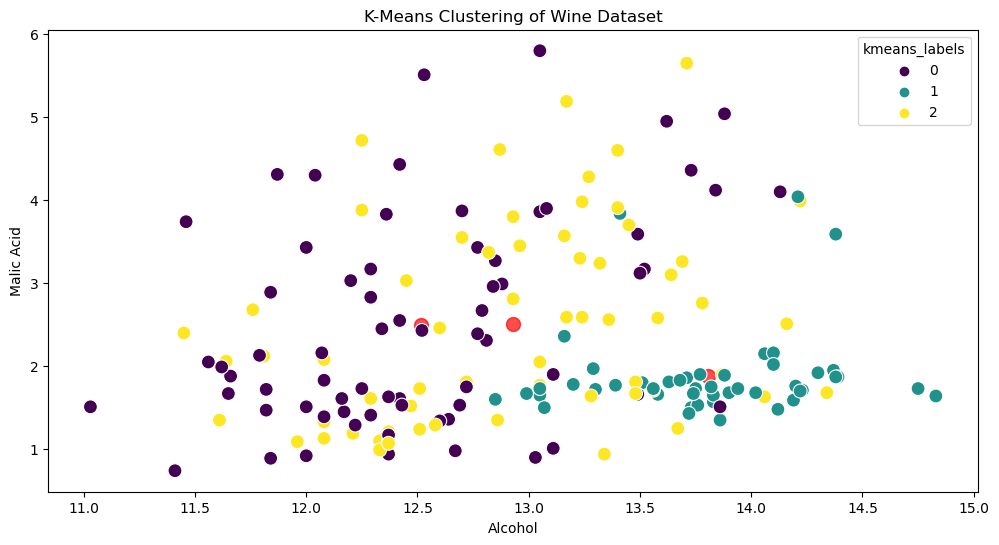

In [30]:
# Apply K-Means clustering to the dataset
kmeans = KMeans(n_clusters = 3, random_state = 42) # Initializes the K-Means clustering model to create 3 clusters. The random_state ensures reproducibility
df["kmeans_labels"] = kmeans.fit_predict(df[wine.feature_names]) # Fits the K-Means model to the dataset and predicts the cluster labels for each wine sample

# Plot the clusters (using the first two features for simplicity)
plt.figure(figsize = (12, 6))
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = "red", s = 100, alpha = 0.70)
sns.scatterplot(x = df["alcohol"], y = df["malic_acid"], hue = df["kmeans_labels"], palette = "viridis", s = 100)
plt.title("K-Means Clustering of Wine Dataset")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.show()

#### Agglomerative Clustering
Now, let's apply Agglomerative Clustering to the Wine dataset.

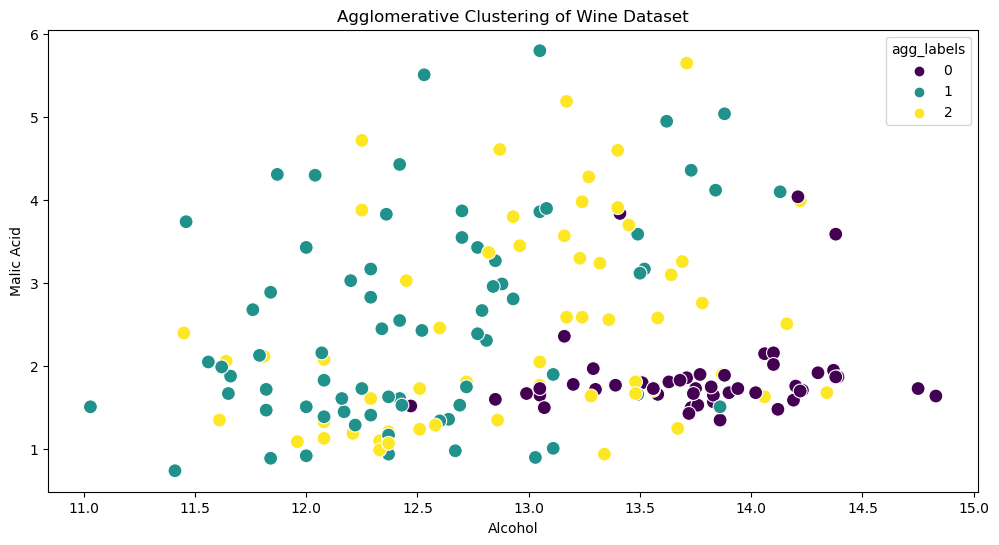

In [31]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters = 3) # Initializes the agglomerative clustering model to create 3 clusters
df["agg_labels"] = agg_clustering.fit_predict(df[wine.feature_names]) # Fits the agglomerative clustering model to the dataset and 
                                                                      # predicts the cluster labels for each wine sample

# Plot the clusters (using the first two features for simplicity)
plt.figure(figsize = (12, 6))
sns.scatterplot(x = df["alcohol"], y = df["malic_acid"], hue = df["agg_labels"], palette = "viridis", s = 100)
plt.title("Agglomerative Clustering of Wine Dataset")
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
plt.show()

We saw how to apply K-Means and Agglomerative Clustering to the Wine dataset and visualize the resulting clusters using scatter plots. By coloring the points based on the cluster labels, we can see how the algorithm groups the data points.

#### Differences Between K-Means and Agglomerative Clustering

**K-Means Clustering**:

- Partitions the data into K clusters by minimizing the variance within each cluster.
- Iteratively updates the centroids and reassigns points to the nearest centroid.
- Sensitive to the initial selection of centroids, which can lead to different results for different initializations.

**Agglomerative Clustering**:

- Builds a hierarchy of clusters by iteratively merging the closest pairs of clusters.
- Does not require the number of clusters to be specified in advance (though it can be).
- Creates a dendrogram that can be used to choose the number of clusters by cutting the tree at the desired level.

By visualizing the results, we can observe how the two clustering methods group the data points differently based on their respective algorithms and the `Euclidean` distance metric.

### Using other metrics

To compare the results of K-Means and Agglomerative Clustering using different distance metrics, we can use metrics such as Manhattan distance and Cosine similarity. The standard implementation of KMeans only supports the Euclidean distance metric. However, we can implement KMeans with Manhattan and Cosine distances by modifying the distance calculation. For Manhattan and Cosine distances, will use custom functions or adapt the clustering process manually.

#### KMeans using Manhattan Distance and Cosine similarity

To implement KMeans with Manhattan distance, we need to redefine the distance calculation and the centroid update step to use Manhattan distance instead of Euclidean distance.

In [32]:
# A function plot_clusters is defined to create scatter plots of the clusters identified by each algorithm.
def plot_clusters(x, y, hue, title):
    plt.figure(figsize = (12, 6))
    sns.scatterplot(x = x, y = y, hue = hue, palette = "viridis", s = 100, data = df)
    plt.title(title)
    plt.xlabel("Alcohol")
    plt.ylabel("Malic Acid")
    plt.legend()
    plt.show()

In [33]:
# Load the Wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df["target"] = wine.target

A custom KMeans class is defined, allowing the use of different distance metrics by modifying the centroid calculation and distance measurement.


In [34]:
# Custom KMeans implementation
class CustomKMeans:
    def __init__(self, n_clusters = 3, max_iter = 100, tol = 1e-4, metric = "euclidean"):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.metric = metric
    
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for i in range(self.max_iter):
            old_centroids = self.centroids.copy()
            labels, _ = pairwise_distances_argmin_min(X, self.centroids, metric = self.metric)
            self.centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])
            if np.all(np.abs(self.centroids - old_centroids) < self.tol):
                break
        self.labels_ = labels

In [35]:
# Apply K-Means clustering using Euclidean distance
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_labels'] = kmeans.fit_predict(df[wine.feature_names])

c:\Users\VaGGeorgiev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\VaGGeorgiev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
# Apply custom KMeans clustering using Manhattan distance
kmeans_manhattan = CustomKMeans(n_clusters = 3, metric = "manhattan")
kmeans_manhattan.fit(df[wine.feature_names].values)
df["kmeans_manhattan"] = kmeans_manhattan.labels_

In [37]:
# Apply custom KMeans clustering using Cosine distance
kmeans_cosine = CustomKMeans(n_clusters = 3, metric = "cosine")
kmeans_cosine.fit(df[wine.feature_names].values)
df['kmeans_cosine'] = kmeans_cosine.labels_

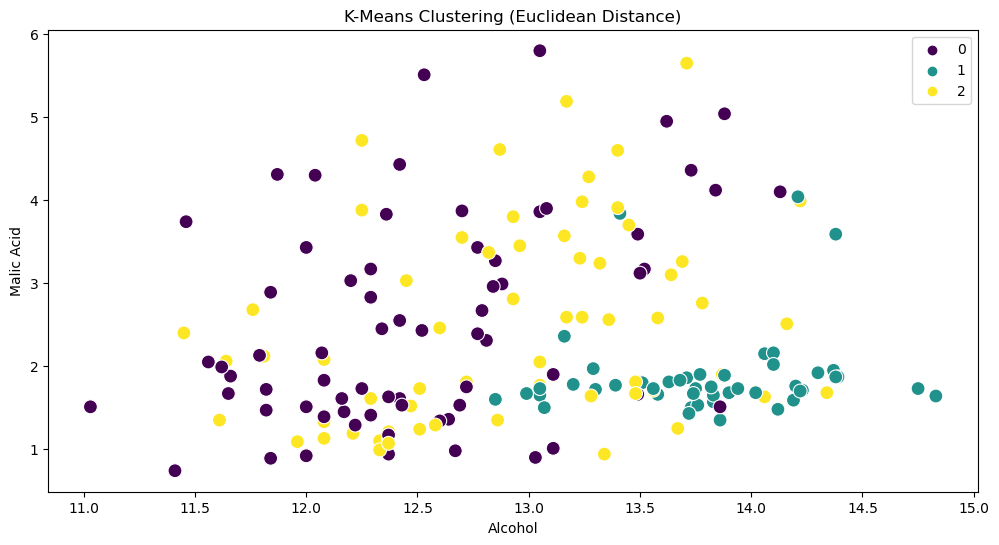

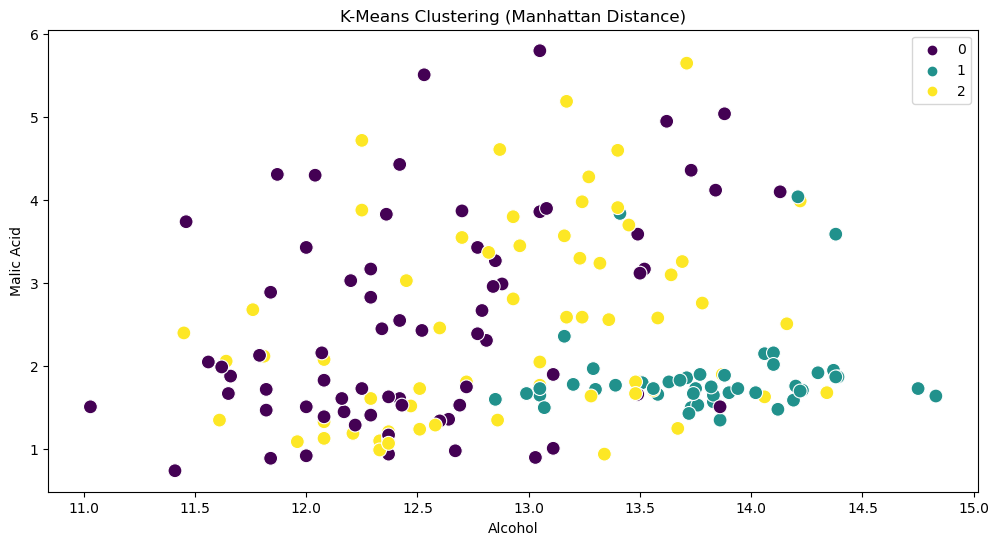

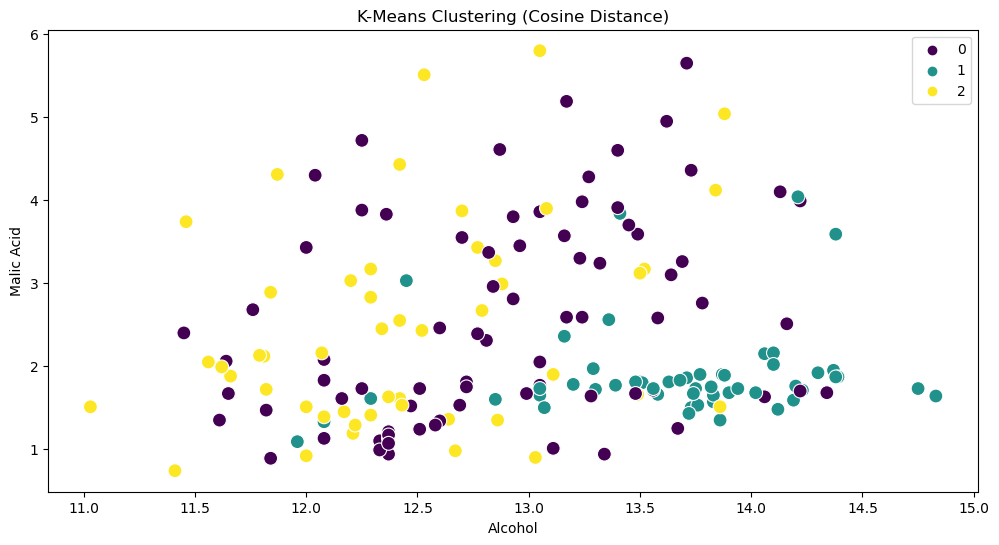

In [38]:
# Plotting the clusters
plot_clusters('alcohol', 'malic_acid', 'kmeans_labels', 'K-Means Clustering (Euclidean Distance)')
plot_clusters("alcohol", "malic_acid", "kmeans_manhattan", "K-Means Clustering (Manhattan Distance)")
plot_clusters("alcohol", "malic_acid", "kmeans_cosine", "K-Means Clustering (Cosine Distance)")

#### Agglomerative Clustering using Manhattan Distance and Cosine similarity

AgglomerativeClustering supports different linkage criteria and metrics, including Manhattan distance and Cosine similarity.

In [39]:
# Apply Agglomerative Clustering using Euclidean distance
agg_clustering_euclidean = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
df["agg_euclidean"] = agg_clustering_euclidean.fit_predict(df[wine.feature_names])

# Apply Agglomerative Clustering using Manhattan distance
agg_clustering_manhattan = AgglomerativeClustering(n_clusters = 3, affinity = "manhattan", linkage = "complete")
df["agg_manhattan"] = agg_clustering_manhattan.fit_predict(df[wine.feature_names])

# Apply Agglomerative Clustering using Cosine distance
agg_clustering_cosine = AgglomerativeClustering(n_clusters = 3, affinity = "cosine", linkage = "complete")
df["agg_cosine"] = agg_clustering_cosine.fit_predict(df[wine.feature_names])

c:\Users\VaGGeorgiev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\VaGGeorgiev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\VaGGeorgiev\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


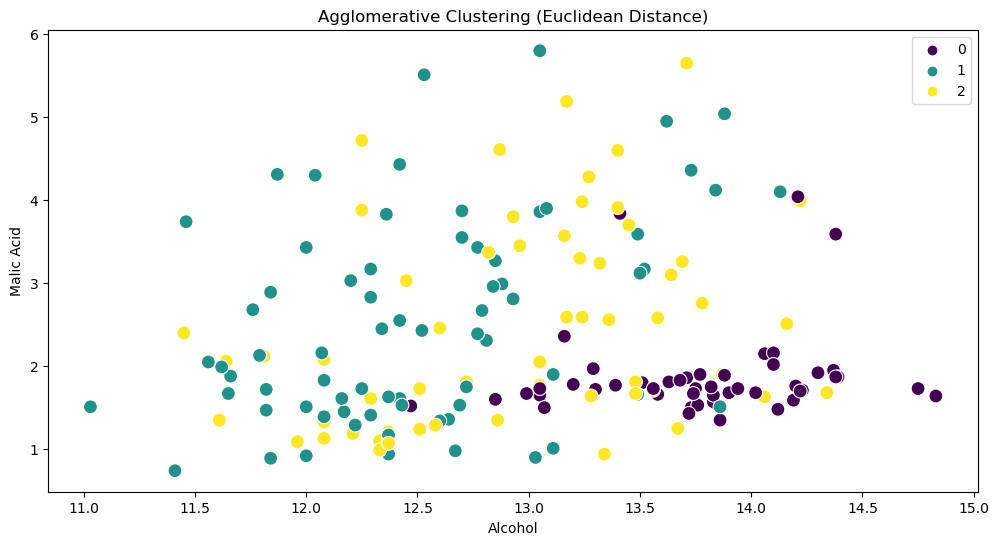

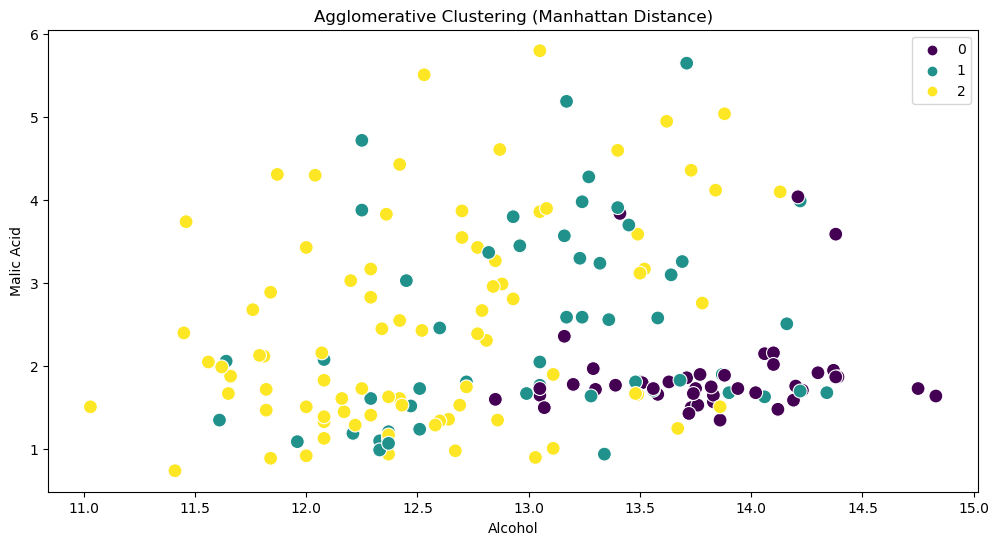

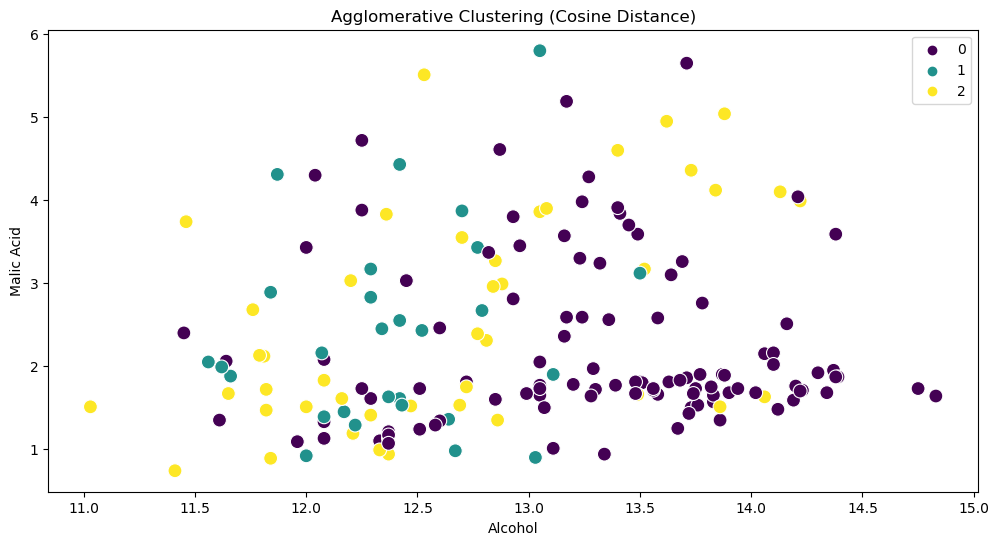

In [40]:
plot_clusters("alcohol", "malic_acid", "agg_euclidean", "Agglomerative Clustering (Euclidean Distance)")
plot_clusters("alcohol", "malic_acid", "agg_manhattan", "Agglomerative Clustering (Manhattan Distance)")
plot_clusters("alcohol", "malic_acid", "agg_cosine", "Agglomerative Clustering (Cosine Distance)")

By comparing the plots for `KMeans` and `AgglomerativeClustering` clustering with different distance metrics, we can observe how the choice of distance metric affects the clustering results. Different metrics can lead to different cluster shapes and distributions, providing insights into the structure of the data.

This implementation provides a comprehensive view using different distance metrics, highlighting the importance of choosing an appropriate distance measure based on the data characteristics and clustering objectives.

The choice of distance metric significantly affects the quality and outcome of clustering algorithms. It is essential to consider the nature of the data, the specific requirements of the application, and the characteristics of the distance metric when performing cluster analysis. By selecting the appropriate metric, one can achieve more meaningful and accurate clustering results.

#### References

https://en.wikipedia.org/

https://scikit-learn.org/stable/

https://stackoverflow.com/

https://www.kaggle.com/

https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf

https://chatgpt.com/

... and I forgot the other resources... there is a reason if you want I will tell :) 